In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
data_train_path = '/content/train'
data_test_path = '/content/test'
data_validation_path = '/content/validation'

In [8]:
img_width = 180
img_height = 180

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False)

Found 359 files belonging to 36 classes.


In [11]:
data_validation = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False)

Found 351 files belonging to 36 classes.


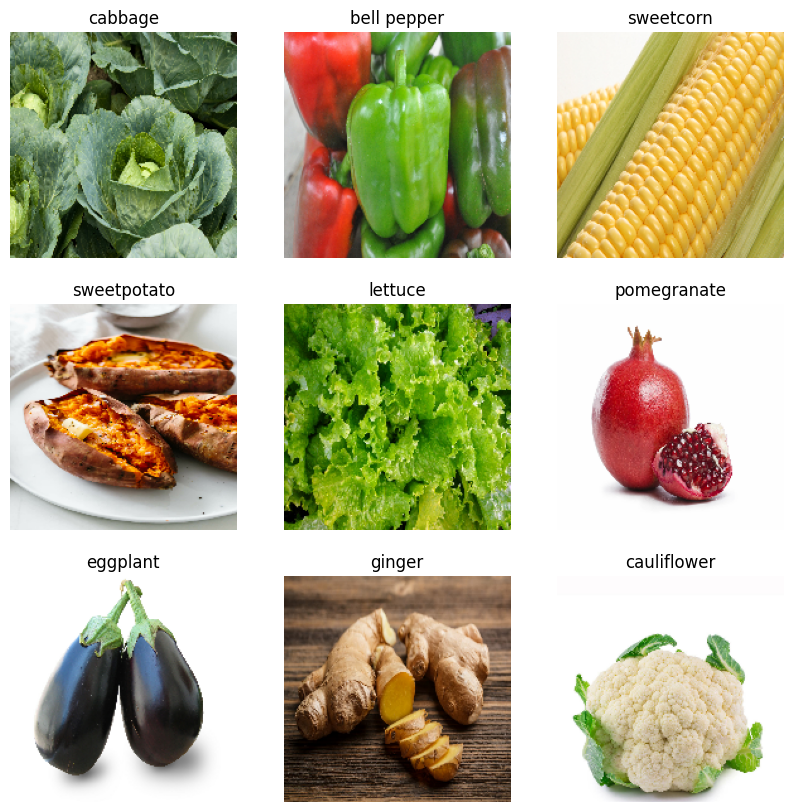

In [12]:
plt.figure(figsize=(10,10))
class_names = data_test.class_names # Get class names from the dataset object
for images, labels in data_test.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]]) # Now you can use class_names to get the class name
    plt.axis('off')

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
data_cat = data_train.class_names

In [25]:
# ... (previous code for data loading and preprocessing) ...

# Define the model only once
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax') # Changed activation to softmax and units to len(data_cat)
])

# Compile the model
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
epochs = 25
history = model.fit(data_train, validation_data=data_validation, epochs=epochs, batch_size=32, verbose=1)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 579ms/step - accuracy: 0.0435 - loss: 3.6103 - val_accuracy: 0.1823 - val_loss: 3.0008
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 593ms/step - accuracy: 0.1489 - loss: 2.9899 - val_accuracy: 0.3248 - val_loss: 2.1946
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 569ms/step - accuracy: 0.2567 - loss: 2.5066 - val_accuracy: 0.4587 - val_loss: 1.6629
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 595ms/step - accuracy: 0.3292 - loss: 2.1992 - val_accuracy: 0.5242 - val_loss: 1.5066
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 594ms/step - accuracy: 0.4052 - loss: 1.9502 - val_accuracy: 0.6268 - val_loss: 1.1947
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 579ms/step - accuracy: 0.4526 - loss: 1.7212 - val_accuracy: 0.7550 - val_loss: 0.9086
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 591ms/step - accuracy: 0.5495 - loss: 1.4368 - val_accuracy: 0.7664 - val_loss: 0.7871
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 580ms/step - accuracy: 0.6547 - loss: 1.1075 - val_accuracy: 0.812

In [44]:
image_path = '/content/banana.jpg'
import os
if not os.path.exists(image_path):
  print(f"Error: Image file not found at {image_path}")

image = tf.keras.utils.load_img(image_path, target_size=(img_width, img_height))
img_arr = tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)
predictions = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [45]:
score = tf.nn.softmax(predictions)

In [46]:
print('veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],100*np.max(score)))

veg/Fruit in image is banana with accuracy of 7.20


In [48]:
model.save('image_classfy.keras')